In [1]:
library(tidyverse)
library(igraph)

── Attaching packages ───────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Internal - 2020 

In [2]:
# Read graph from edges list
edges_int = read_csv("datasets/graph_int.csv", col_names = c("from", "to", "weight"), show_col_types = FALSE)
nodes_int = read_csv("datasets/nodes_int.csv", show_col_types = FALSE)
g <- graph_from_data_frame(edges_int, directed = FALSE, vertices = nodes_int)

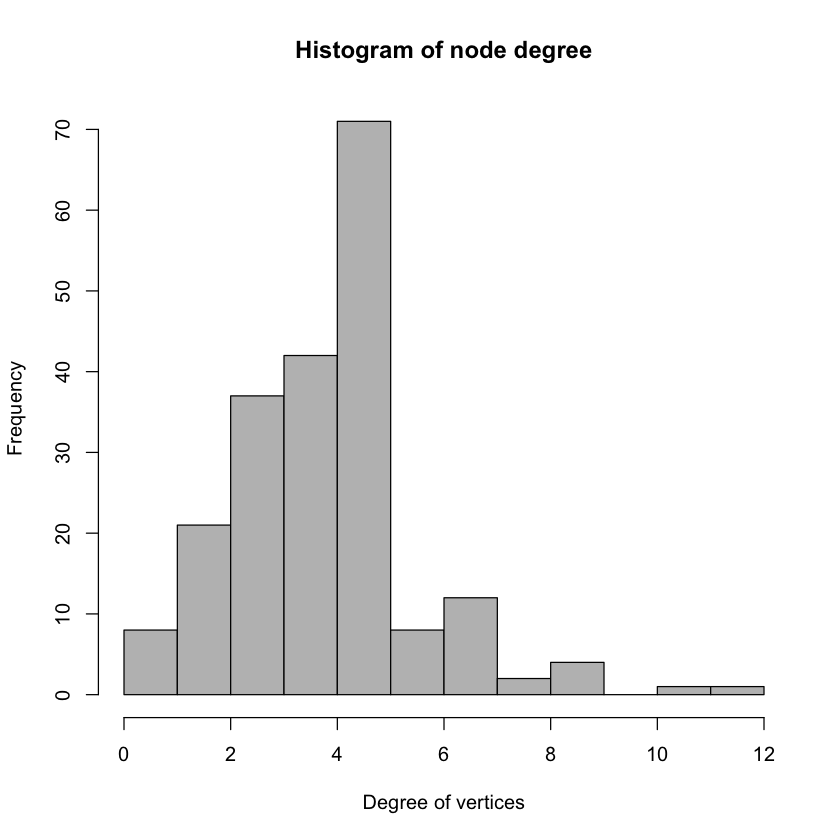

In [3]:
#Histogram of node degree
V(g)$degree <- degree(g)
hist(V(g)$degree,
     col="grey",
     main='Histogram of node degree',
     ylab='Frequency',
     xlab='Degree of vertices')

In [4]:
encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}
V(g)$color = encode_ordinal(V(g)$institutions)

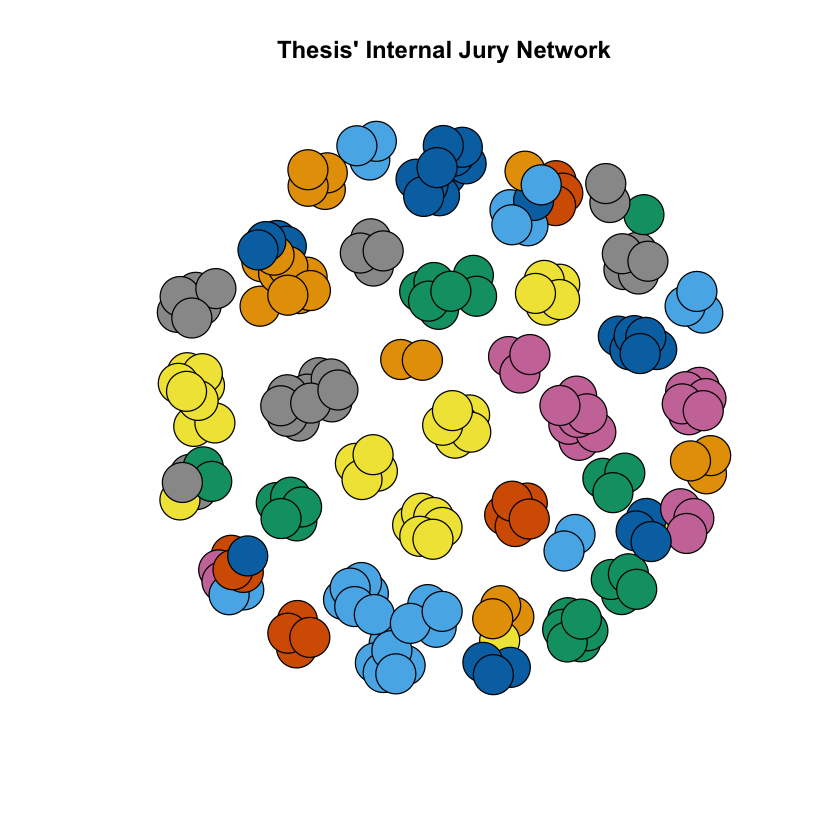

In [5]:
# Display graph
l <- layout_with_fr(g)
plot(g, layout=l,
     vertex.size = 15,
     vertex.label = NA,
     main = "Thesis' Internal Jury Network")

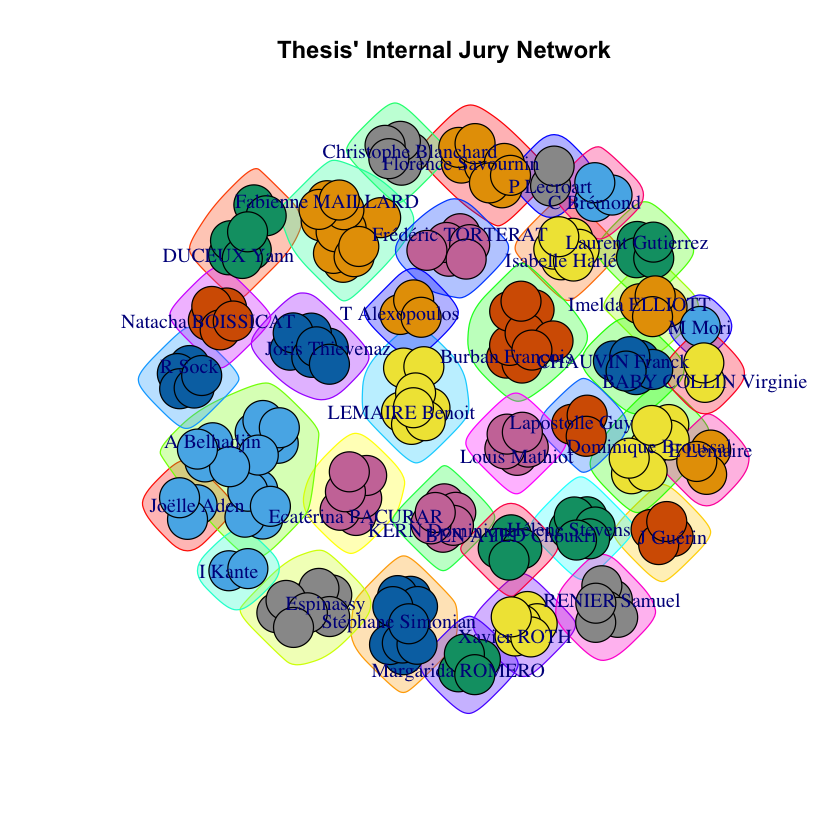

In [6]:
set.seed(2680)
# Community Detection - Louvain
lc <- cluster_louvain(g)
communities = as.data.frame(communities(lc))[,1]
vector <- character(length(communities))
for (i in 1:length(communities)) {
    vector[i] = unlist(communities[i])[1]
}

plot(lc, g,
     vertex.label = ifelse(V(g)$name %in% vector, V(g)$Name, NA),
     vertex.size = 15,
     vertex.label.cex = 1,
     vertex.label = NA,
     main = "Thesis' Internal Jury Network",
    )

In [7]:
communities

[[1]]
[1] "103186018" "157023184" "76700186"  "78455197"  "80921728"  "82100306" 
[7] "84178019"  "95010750" 

[[2]]
[1] "103593462" "35434198"  "35612649" 

[[3]]
[1] "103822453" "15018963X" "179783777" "75643448"  "83638393"  "83867953" 
[7] "93630832" 

[[4]]
[1] "10932286X" "114095507" "114505160" "144696029" "57497346"  "57594236" 

[[5]]
 [1] "111351545" "12182554X" "145318168" "180817930" "181851091" "190959878"
 [7] "191713732" "71200029"  "78714524"  "97640174" 

[[6]]
[1] "111692997" "126043396" "188361316" "79508138" 

[[7]]
[1] "111709814" "139857427" "3558162X"  "50714619"  "58500456"  "82292477" 
[7] "90444590" 

[[8]]
 [1] "112210805" "13185996X" "150707118" "183652053" "230393330" "51621509" 
 [7] "55387470"  "74433261"  "77902092"  "80234798" 

[[9]]
[1] "112707645" "114307121" "32547749"  "34947485" 

[[10]]
 [1] "11317022X" "114719217" "116850108" "119049112" "142499250" "147610869"
 [7] "16903061X" "182504247" "203912055" "31061451"  "5220300X"  "69940010" 
[13] "70288615"  "84598425"  "85802638"  "87101203" 

[[11]]
[1] "113455844" "155706632" "26768801"  "2713251X" 

[[12]]
[1] "115863869" "179781006" "26714108"  "34346643"  "57786046"  "61782270" 
[7] "69168954" 

[[13]]
[1] "120121360" "150987293" "153090901" "159196205" "197382185" "74263595" 

[[14]]
[1] "120287404" "157237427" "169387089" "185626351" "28793064"  "32719965" 
[7] "33583382"  "61110949"  "6905472X" 

[[15]]
[1] "12047476X" "155655434" "224551345" "35807660"  "83558462"  "95389334" 

[[16]]
[1] "124034004" "135401925" "33978182"  "77399579"  "98582860" 

[[17]]
 [1] "129209872" "143008153" "179963988" "181848406" "34592466"  "34799923" 
 [7] "35785926"  "59433000"  "69039089"  "74685961"  "77712986"  "80001122" 
[13] "91450993" 

[[18]]
[1] "130351261" "167357808"

[[19]]
[1] "131685007" "162216661" "35279281"  "57531331"  "80632718"  "94686203" 

[[20]]
[1] "139428127" "139721010" "161118291" "220105022" "32154089"  "60839503" 
[7] "6982004X"  "80526470" 

[[21]]
[1] "143344412" "194969770" "3028404X"  "34592768"  "85907014" 

[[22]]
[1] "144233916" "15212358X" "70360235" 

[[23]]
[1] "147807018" "34852069"  "60785020"  "79359914"  "83045228"  "86862057" 

[[24]]
[1] "149688792" "80173578" 

[[25]]
[1] "151121354" "158261526" "80578233" 

[[26]]
[1] "153220759"

[[27]]
[1] "153290293" "57765766"  "59316640"  "83932380" 

[[28]]
[1] "157325709" "193705974" "198437668" "32203772"  "8181500X"  "91901243" 

[[29]]
[1] "166272922" "174534310" "175263868" "242295169" "27078876"  "33274320" 
[7] "34055320"  "78972485" 

[[30]]
[1] "166964778" "177208899" "190496029" "194112624" "34223940" 

[[31]]
[1] "168902273" "34818715"  "52445798"  "71490825"  "92685609" 

[[32]]
[1] "184572312" "28824644"  "33533326"  "6942117X"  "93551991"  "95664629" 

[[33]]
[1] "185577318" "29367247"  "60307218" 

[[34]]
[1] "227436474" "35104589"  "93544499" 

[[35]]
[1] "59195975" "70232016" "75694980" "94835462"

[[36]]
[1] "69558132" "77902033"

## External - 2020

In [8]:
# Read graph from edges list
edges_ext = read_csv("datasets/graph_ext.csv", col_names = c("from", "to", "weight"), show_col_types = FALSE)
nodes_ext = read_csv("datasets/nodes_ext.csv", show_col_types = FALSE)
g <- graph_from_data_frame(edges_ext, directed = FALSE, vertices = nodes_ext)

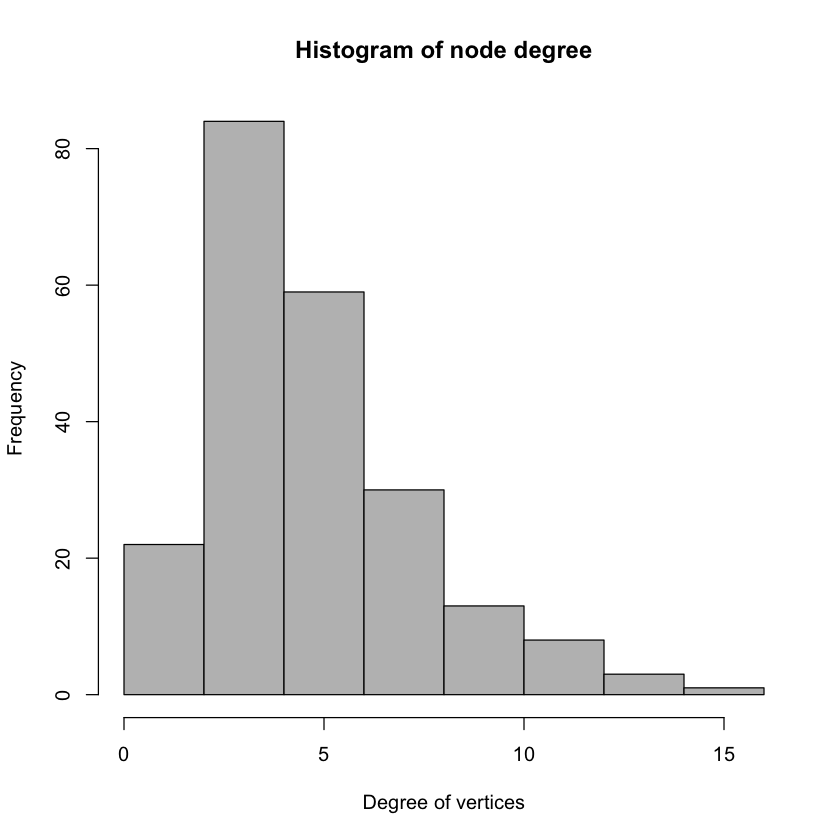

In [9]:
#Histogram of node degree
V(g)$degree <- degree(g)
hist(V(g)$degree,
     col="grey",
     main='Histogram of node degree',
     ylab='Frequency',
     xlab='Degree of vertices')

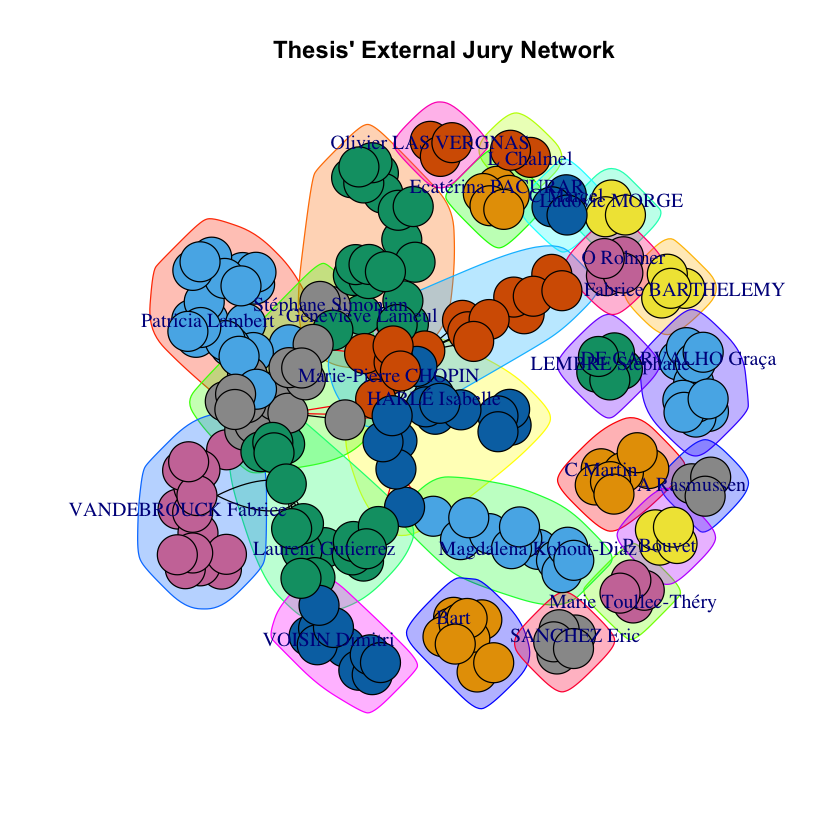

In [10]:
set.seed(2680)
# Community Detection - Louvain
lc <- cluster_louvain(g)
communities = as.data.frame(communities(lc))[,1]
vector <- character(length(communities))
for (i in 1:length(communities)) {
    vector[i] = unlist(communities[i])[1]
}

plot(lc, g,
     vertex.label = ifelse(V(g)$name %in% vector, V(g)$Name, NA),
     vertex.size = 15,
     vertex.label.cex = 1,
     vertex.label = NA,
     vertex.label.dist = 0,
     main = "Thesis' External Jury Network",
    )

In [11]:
communities

[[1]]
[1] "101879113" "19757033X" "199483795" "26701154"  "32268386"  "34592768" 
[7] "79289843" 

[[2]]
 [1] "103874216" "112353916" "114719217" "115863869" "117481548" "123980380"
 [7] "129209872" "135653088" "15212358X" "152325034" "195933664" "29367247" 
[13] "31359922"  "33782687"  "35326727"  "50127462"  "69039089"  "70194602" 
[19] "75645939"  "78455197"  "79500064" 

[[3]]
 [1] "103955704" "130361372" "140804994" "175353247" "178789240" "186402848"
 [7] "198308671" "33846936"  "57765766"  "60839503"  "68729529"  "69006601" 
[13] "69940010"  "76065081"  "83418822"  "86862057"  "87498847"  "93052553" 
[19] "94654972"  "95633928" 

[[4]]
[1] "107947072" "75691310"  "84735562"  "87102358" 

[[5]]
 [1] "10932286X" "112381170" "129135763" "130940291" "170139077" "199707200"
 [7] "223774979" "52022056"  "56263619"  "60784407"  "6905472X"  "73378410" 
[13] "77863186"  "77902092"  "87489708" 

[[6]]
[1] "110137256" "76148459" 

[[7]]
[1] "111224004" "117204080" "133105296" "169855414"

[[8]]
 [1] "111351545" "114505160" "119170302" "135643198" "162205295" "179004794"
 [7] "182302237" "34055320"  "50379402"  "50775561"  "58215360"  "60112654" 
[13] "74242717"  "7570000X"  "77712994"  "92157548"  "97640174" 

[[9]]
[1] "111709814" "131120875" "148648665" "52202119"  "55320473" 

[[10]]
 [1] "112451713" "129458929" "160524946" "167805223" "50487957"  "50516167" 
 [7] "57565716"  "60741635"  "76700186"  "87989425"  "89759567"  "91899052" 
[13] "99261723" 

[[11]]
 [1] "113455844" "114095507" "121416593" "123626781" "15764250X" "185508766"
 [7] "227450140" "50714619"  "59625201"  "5978136X"  "61782270"  "68780923" 
[13] "69846952"  "91989280"  "93630832"  "94660808" 

[[12]]
[1] "118185276" "184546095" "7957047X" 

[[13]]
[1] "121566307" "194321509" "99530295" 

[[14]]
 [1] "126235546" "152428348" "157237427" "167357808" "194886913" "29467365" 
 [7] "30963648"  "34359443"  "52451658"  "54377595"  "59544120"  "70549923" 
[13] "73307807"  "7577190X"  "77013808"  "86182390"  "87582929" 

[[15]]
 [1] "128468041" "133380130" "13364233X" "134244060" "13801244X" "143392719"
 [7] "153570814" "157231550" "157447685" "170791157" "30956544"  "58590323" 
[13] "61110949"  "76536645"  "95203346" 

[[16]]
[1] "129974641" "149379234" "5577170X" 

[[17]]
 [1] "130566993" "167831402" "198065787" "219962677" "26844311"  "57291519" 
 [7] "57487383"  "58920943"  "61024201"  "70543771"  "88046494" 

[[18]]
 [1] "13110571X" "135676878" "13960992X" "147165148" "166272922" "179942042"
 [7] "223942421" "34852069"  "74435728"  "76977013"  "85802638" 

[[19]]
[1] "132160218" "135608104" "150659067" "28827546"  "84598425"  "86451979" 

[[20]]
[1] "133618382" "159017920" "32508026"  "60785020" 

[[21]]
 [1] "137793901" "167916041" "189859490" "193705974" "61388688"  "70214220" 
 [7] "7139611X"  "83662596"  "83720103"  "88086534"  "90444590" 

[[22]]
[1] "139857427" "76513351"  "98141392" 

[[23]]
[1] "178800333" "223496898" "6993696X"  "86137972" 

[[24]]
[1] "223756237" "34241388"  "75643448"  "80096786"  "83966854"